# PCA
<img src="resim/PCA.JPG" alt="PCA.JPG" width="400">


# Izdusumun Varyansi
<img src="resim/varyans_izdusum.JPG" alt="varyans_izdusum.JPG" width="400">


# PCA: Izdusumun Varyansini Maksimize et

## Verideki dagilimi en iyi yansitan izdusum yonunu ariyoruz
<img src="resim/varyans_maksimize_et.JPG" alt="varyans_maksimize_et.JPG" width="400">

## İspat
Ethem Alpaydın hoca'nın kitabından detaylara bakılabilir.
<img src="resim/PCA_Ethem_Alpaydın.png" alt="varyans_maksimize_et.JPG" width="400">



## Kutuphaneleri yukleyelim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Verimizi olusturalim

Verimizin boyutlari: $5 \times 3$

In [2]:
X = np.array([
    [1,2,4],
    [2,2,9],
    [3,2,12],
    [4,2,21],
    [5,2,23],
])

In [3]:
X

array([[ 1,  2,  4],
       [ 2,  2,  9],
       [ 3,  2, 12],
       [ 4,  2, 21],
       [ 5,  2, 23]])

In [4]:
X.shape

(5, 3)

### Verideki Oznitelikler ne kadar faydali

2.oznitelik gereksiz
 - 2.oznitelikteki standard sapma 0 oldugu icin

In [5]:
X.std(axis = 0)

array([1.41421356, 0.        , 7.1944423 ])

In [6]:
X[:,[0,2]]

array([[ 1,  4],
       [ 2,  9],
       [ 3, 12],
       [ 4, 21],
       [ 5, 23]])

##### Otomatik olarak, varyansi th = 0.05'den kucuk verileri silelim

In [7]:
onemli_oznitelikler = np.where(X.std(axis = 0) > 0.05)
onemli_oznitelikler

(array([0, 2]),)

In [8]:
X = X[:,onemli_oznitelikler[0]]
X

array([[ 1,  4],
       [ 2,  9],
       [ 3, 12],
       [ 4, 21],
       [ 5, 23]])

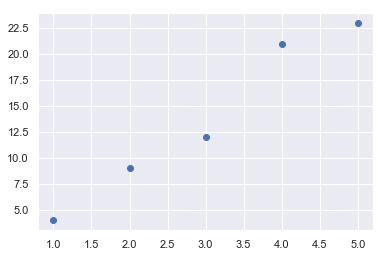

In [9]:
plt.plot(X[:,0], X[:,1], 'o')

## Veriyi normalize edelim

In [10]:
X_normal = (X - X.mean(axis = 0))/(X.std(axis = 0))
X_normal

array([[-1.41421356, -1.36216257],
       [-0.70710678, -0.66718167],
       [ 0.        , -0.25019312],
       [ 0.70710678,  1.0007725 ],
       [ 1.41421356,  1.27876486]])

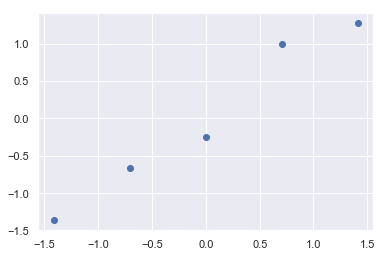

In [11]:
plt.plot(X_normal[:,0], X_normal[:,1], 'o')

In [12]:
X_normal.shape

(5, 2)

## Sklearn PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_normal)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [15]:
print(pca.explained_variance_)

[2.47856427 0.02143573]


[Kaynak](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=dSSbhDkWbvPM)

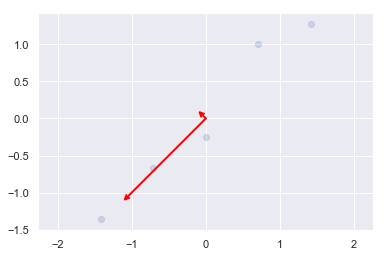

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color = "red",
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_normal[:, 0], X_normal[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [17]:
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    print("\neigenvalue: {}".format(eigenvalue))
    print(eigenvector)
    print("eigenvector length: {}".format(eigenvector.dot(eigenvector.T)))
    


eigenvalue: 2.478564271829298
[-0.70710678 -0.70710678]
eigenvector length: 1.0

eigenvalue: 0.02143572817070088
[-0.70710678  0.70710678]
eigenvector length: 1.0


In [18]:
X_normal

array([[-1.41421356, -1.36216257],
       [-0.70710678, -0.66718167],
       [ 0.        , -0.25019312],
       [ 0.70710678,  1.0007725 ],
       [ 1.41421356,  1.27876486]])

In [19]:
PC1 = pca.components_[0]
PC1

array([-0.70710678, -0.70710678])

## Verinin Temel bilesen uzerine izdusumu

<img src="resim/izdusum.png" alt="izdusumu" width="400">

In [20]:
izdusum1 = X_normal.dot(PC1)
izdusum1

array([ 1.96319439,  0.97176868,  0.17691326, -1.20765302, -1.9042233 ])

## Maksimize etmek istedigimiz varyans

In [21]:
np.var(izdusum1, axis = 0)

1.9828514174634393

## Covaryans Matrisi

In [22]:
COV = X_normal.T.dot(X_normal)
COV

array([[5.        , 4.91425709],
       [4.91425709, 5.        ]])

## Ozdeger ve Ozvektorler

```pyhton 
np.linalg.eig?
```

> The normalized (unit "length") eigenvectors, such that the
    column ``v[:,i]`` is the eigenvector corresponding to the
    eigenvalue ``w[i]``.


# El yapimi PCA

In [23]:
COV = X_normal.T.dot(X_normal)
ozdegerler, ozvektorler = np.linalg.eig(COV)

ozvektorler_tersi = np.linalg.inv(ozvektorler)
ozdegerler = ozdegerler/4

print("Maksimize etmek istedigimiz varyans")
print((1/4) * ozvektorler_tersi.dot(COV).dot(ozvektorler))

w1,w2 = ozvektorler[:,0], ozvektorler[:,1]
print("\nOzvektor 1 : Temel Bilesen 1")
print(w1)
print("Ozdeger 1: {}".format(ozdegerler[0]))

print("\nOzvektor 2 : Temel Bilesen 2")
print(w2)
print("Ozdeger 2: {}".format(ozdegerler[1]))

Maksimize etmek istedigimiz varyans
[[2.47856427 0.        ]
 [0.         0.02143573]]

Ozvektor 1 : Temel Bilesen 1
[0.70710678 0.70710678]
Ozdeger 1: 2.4785642718292986

Ozvektor 2 : Temel Bilesen 2
[-0.70710678  0.70710678]
Ozdeger 2: 0.02143572817070094


# Veri Donusumu
<img src="resim/veri_donusumu.JPG" alt="veri_donusumu" width="400">


# Veri Donusumu 
## Varyansi Maksimize eden Temel Bilesenler Vektor Uzayinda veri

In [24]:
X_donus = X_normal.dot(ozvektorler) 
X_donus

array([[-1.96319439,  0.03680561],
       [-0.97176868,  0.02823132],
       [-0.17691326, -0.17691326],
       [ 1.20765302,  0.20765302],
       [ 1.9042233 , -0.0957767 ]])

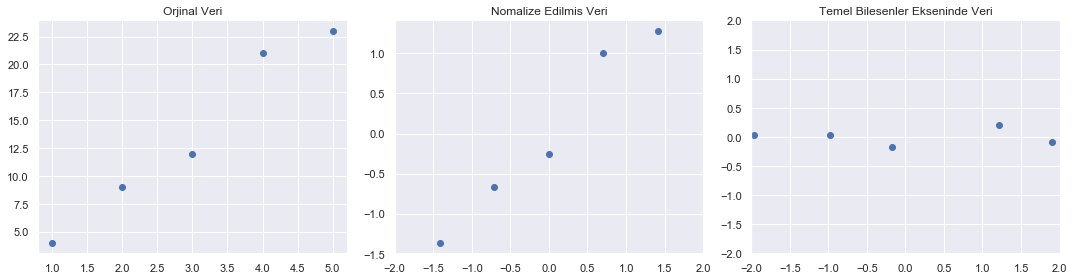

In [25]:
fig = plt.figure(figsize = (15,4))

plt.subplot(1, 3, 1)
plt.plot(X[:,0], X[:,1], 'o')
plt.title('Orjinal Veri')

plt.subplot(1, 3, 2)
plt.plot(X_normal[:,0], X_normal[:,1], 'o')
plt.title('Nomalize Edilmis Veri')
#plt.ylim((-2,2))
plt.xlim((-2,2))

plt.subplot(1, 3, 3)
plt.plot(X_donus[:,0], X_donus[:,1], 'o')
plt.title('Temel Bilesenler Ekseninde Veri')
plt.ylim((-2,2))
plt.xlim((-2,2))

plt.tight_layout()

# Ters Donusum (Inverse transform)

In [26]:
X_normal

array([[-1.41421356, -1.36216257],
       [-0.70710678, -0.66718167],
       [ 0.        , -0.25019312],
       [ 0.70710678,  1.0007725 ],
       [ 1.41421356,  1.27876486]])

In [27]:
X_normal.dot(ozvektorler).dot(ozvektorler_tersi)

array([[-1.41421356, -1.36216257],
       [-0.70710678, -0.66718167],
       [ 0.        , -0.25019312],
       [ 0.70710678,  1.0007725 ],
       [ 1.41421356,  1.27876486]])

# PCA ile Anomali Tespiti
<img src="resim/anomali.JPG" alt="anomali" width="400">



In [28]:
X = np.array([
    [1, 4],
    [2, 9],
    [4,21],
    [5,23],
    [1, 6],
    [2, 11],
    [4,20],
    [5,21],
    [1, 5],
    [2, 10],
    [4,24],
    [5,26],
    [3,-1],
])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)
X_normal

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.31656118, -1.12614499],
       [-0.65828059, -0.54977157],
       [ 0.65828059,  0.83352464],
       [ 1.31656118,  1.06407401],
       [-1.31656118, -0.89559563],
       [-0.65828059, -0.3192222 ],
       [ 0.65828059,  0.71824996],
       [ 1.31656118,  0.83352464],
       [-1.31656118, -1.01087031],
       [-0.65828059, -0.43449689],
       [ 0.65828059,  1.17934869],
       [ 1.31656118,  1.40989806],
       [ 0.        , -1.70251842]])

In [30]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_normal)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    print("\neigenvalue: {}".format(eigenvalue))
    print(eigenvector)
    print("eigenvector length: {}".format(eigenvector.dot(eigenvector.T)))


eigenvalue: 2.000253969322824
[0.70710678 0.70710678]
eigenvector length: 0.9999999999999999

eigenvalue: 0.16641269734384287
[ 0.70710678 -0.70710678]
eigenvector length: 0.9999999999999999


## Temel bilesen varyansin yuzde kacini acikliyor

In [32]:
pca.explained_variance_ / np.sum(pca.explained_variance_)

array([0.92319414, 0.07680586])

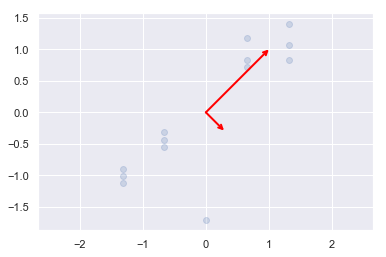

In [33]:
# plot data
plt.scatter(X_normal[:, 0], X_normal[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [34]:
PC1 = pca.components_[0]
PC2 = pca.components_[1]

## Temel Bilesen 1 (Normal Veri Uzayina Izdusum)

In [35]:
izdusum1 = np.abs(X_normal.dot(PC1))
print(izdusum1)

[1.7272541  0.85422187 1.05486559 1.68336328 1.56423108 0.69119885
 0.97335408 1.52034026 1.64574259 0.77271036 1.29940013 1.92789782
 1.20386232]


## Temel Bilesen 2 (Anomali Veri Uzayina Izdusum)
 - Anomali haric, tum verilerin izdusumu sifira yakin

In [36]:
izdusum2 = np.abs(X_normal.dot(PC2))
print(izdusum2)

[0.13464457 0.07672746 0.12391626 0.17853539 0.2976676  0.23975048
 0.04240475 0.34155841 0.21615609 0.15823897 0.36845079 0.06599915
 1.20386232]


In [37]:
m,s = izdusum2.mean(), izdusum2.std()
m,s

(0.2652240177426594, 0.28856184958779146)

In [38]:
m + 3*s

1.1309095665060338

# Gercek Veri Ile Calisma

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

y = cancer['target']
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


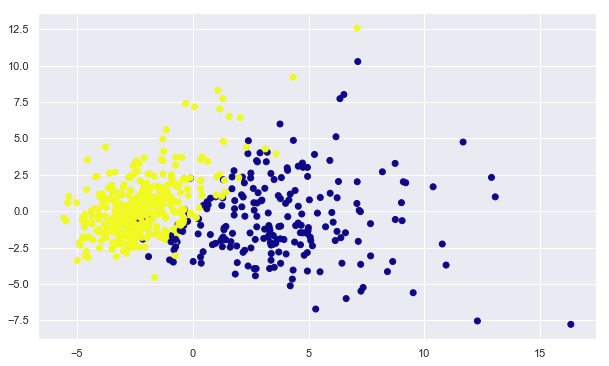

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)

plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='plasma')
plt.xlabel = "First Principal Component"
plt.ylabel = "Second Principal component"
plt.show()

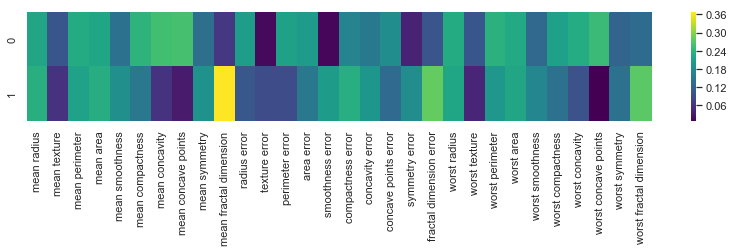

In [52]:
df_comp = pd.DataFrame(np.abs(pca.components_), columns=cancer['feature_names'])
plt.figure(figsize=(14,2))
sns.heatmap(df_comp, cmap='viridis')

In [47]:
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])